### Always Printing out the Current Version of Python This Notebook Runs

In [1]:
import sys
print("Python Version is: " + sys.version)

Python Version is: 3.11.2 | packaged by Anaconda, Inc. | (main, Mar 27 2023, 23:35:04) [MSC v.1916 64 bit (AMD64)]


### Importing Libraries and Changing Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sns.set(color_codes = True)
#sns.set(style="whitegrid")
#sns.set_palette("Set3")

# Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)

### Importing Cleaned & normalized CSV dataset

In [3]:
# For cluster analysis
df = pd.read_csv("Cleaned DF/_Normalized_XGBoost_DF.csv") 

### Creating a new dataframe from a copy of the original but only with ID and Satisfaction columns

In [4]:
selected_columns = ['ID', 'Satisfaction']
new_df = df[selected_columns].copy()

### Importing the model from the train/test split on my other notebook

In [5]:
import joblib

# Load the model from the file
model = joblib.load('Saved_Models\XGBoost_model.pkl')

### Running the model againts the entire dataset, no need to tweak anything, that was done in other notebook

In [6]:
# Assuming you have already loaded the model as 'model' and have the dataset as 'df'

# Drop any unnecessary columns if needed
columns_to_drop = ['ID','Satisfaction']
df = df.drop(columns=columns_to_drop)

# Make predictions on the dataset
predictions = model.predict(df)

# Add the predictions to the DataFrame
df['Predicted_Target'] = predictions

In [7]:
df

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Predicted_Target
0,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1,0,1,0,1,0,0,0
1,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0,1,1,0,1,0,0,1
2,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,1,0,1,1,0,1,0,0,1
3,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,1,0,1,1,0,1,0,0,1
4,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,-0.755852,-0.745218,-0.333948,-0.314618,4,4,4,4,2,5,1,4,4,4,5,4,4,4,0,1,0,1,0,1,0,0,1,0
129876,0.103976,-0.884573,-0.386481,-0.392678,5,3,5,3,4,5,2,5,2,2,4,3,2,5,0,1,0,1,0,1,0,0,1,0
129877,0.170117,-0.855499,-0.228881,-0.028396,5,2,4,2,1,3,3,4,3,3,4,2,3,5,0,1,0,1,0,1,0,0,1,0
129878,0.699242,-0.855499,0.427787,0.179765,4,4,3,4,1,4,4,5,3,3,4,5,3,5,0,1,0,1,0,1,0,0,1,1


When you load a trained model, the model object itself doesn't inherently know what the target variable is. The model object primarily contains the learned parameters and configurations from the training process. Therefore, it's important to keep track of the target variable separately and ensure consistency when using the model.

During the training phase, you would have explicitly specified the target variable when training the model. The model is trained to learn the relationship between the input features and the specified target variable. The trained model captures this relationship in its learned parameters.

When you load the trained model into a new session or environment, you need to ensure that you have the necessary data with the same structure and feature names as used during training. You would typically provide the input features to the loaded model and expect the model to make predictions or classifications based on the learned patterns.

In summary, the loaded model itself doesn't have explicit knowledge of the target variable. It relies on you to provide the appropriate input features and expects you to know the target variable for making predictions or classifications.

### Adding the new_df of ID and Satisifaction columns to the df with predictions

In [8]:
df2 = pd.concat([new_df,df], axis=1)
df2.head()

,ID,Satisfaction,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Predicted_Target
0,1,0,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1,0,1,0,1,0,0,0
1,2,1,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0,1,1,0,1,0,0,1
2,3,1,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,1,0,1,1,0,1,0,0,1
3,4,1,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,1,0,1,1,0,1,0,0,1
4,5,1,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0,1,1,0,1,0,0,1


### Adding the prediction details to see what matches

In [9]:
df2['Comparison'] = np.where(df2['Satisfaction'] == df2['Predicted_Target'], 'Match', 'Non-Matching')

In [10]:
df2.head()

,ID,Satisfaction,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Predicted_Target,Comparison
0,1,0,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1,0,1,0,1,0,0,0,Match
1,2,1,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0,1,1,0,1,0,0,1,Match
2,3,1,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,1,0,1,1,0,1,0,0,1,Match
3,4,1,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,1,0,1,1,0,1,0,0,1,Match
4,5,1,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0,1,1,0,1,0,0,1,Match


### Reorganizing the columns

In [11]:
columns = list(df2.columns)
predicted_target_index = columns.index('Predicted_Target')
comparison_index = columns.index('Comparison')

columns.insert(2, columns.pop(predicted_target_index))
columns.insert(3, columns.pop(comparison_index))

df2 = df2[columns]

In [12]:
df2.head()

,ID,Satisfaction,Predicted_Target,Comparison,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,0,0,Match,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1,0,1,0,1,0,0
1,2,1,1,Match,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0,1,1,0,1,0,0
2,3,1,1,Match,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,1,0,1,1,0,1,0,0
3,4,1,1,Match,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,1,0,1,1,0,1,0,0
4,5,1,1,Match,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0,1,1,0,1,0,0


### Viewing the matrix 

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

[Text(0, 0, 'Negative'), Text(0, 1, 'Positive')]

Text(0.5, 0, 'Predicted Target')

Text(0, 0.5, 'Actual Satisfaction')

Text(0.5, 1.0, 'Confusion Matrix')

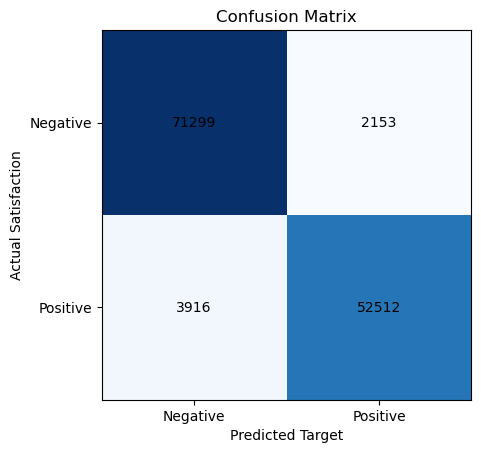

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get the actual and predicted labels
y_actual = df2['Satisfaction']
y_predicted = df2['Predicted_Target']

# Create the confusion matrix
confusion_matrix = np.zeros((2, 2))

for actual, predicted in zip(y_actual, y_predicted):
    confusion_matrix[actual, predicted] += 1

# Set the labels for the matrix
labels = ['Negative', 'Positive']

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='Blues')

# Add colorbar
#cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Set axis labels and title
ax.set_xlabel('Predicted Target')
ax.set_ylabel('Actual Satisfaction')
ax.set_title('Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, int(confusion_matrix[i, j]),
                       ha="center", va="center", color="black")


# Display the plot
plt.show()


### Full Model Prediction

In [14]:
df2.to_csv('Cleaned DF\Full_Model_Prediction_XGBoost_DF.csv', index=False)

In [15]:
df2.head()

,ID,Satisfaction,Predicted_Target,Comparison,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,0,0,Match,0.566960,-0.370261,-0.333948,-0.262578,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1,0,1,0,1,0,0
1,2,1,1,Match,-0.292868,-0.370261,0.296454,0.622108,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0,1,1,0,1,0,0
2,3,1,1,Match,0.103976,-0.338179,-0.386481,-0.392678,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,1,0,1,1,0,1,0,0
3,4,1,1,Match,0.699242,0.716512,-0.386481,-0.392678,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,1,0,1,1,0,1,0,0
4,5,1,1,Match,0.633101,2.285515,-0.386481,-0.366658,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0,1,1,0,1,0,0


### Next is to add this prediction to the full and cleaned non-normalized dataframe

In [16]:
# For cluster analysis

df3 = pd.read_csv("Cleaned DF/Cleaned_XGBoost_DF.csv") 

In [17]:
df3.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0
1,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0
2,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0


In [18]:
# Keep only these two columns from the dataframe with the predictions/results

columns_to_keep = df2[['Predicted_Target','Comparison']]
columns_to_keep.head()

,Predicted_Target,Comparison
0,0,Match
1,1,Match
2,1,Match
3,1,Match
4,1,Match


In [19]:
# Join them togethe (non-normalized data)

df4 = pd.concat([columns_to_keep,df3], axis=1)
df4.head()

,Predicted_Target,Comparison,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,0,Match,1,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,0,1,1,0,1,0,1,0,0
1,1,Match,2,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,1,0,0,1,1,0,1,0,0
2,1,Match,3,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1,0,1,0,1,1,0,1,0,0
3,1,Match,4,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1,0,1,0,1,1,0,1,0,0
4,1,Match,5,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,1,0,0,1,1,0,1,0,0


In [20]:
# Reorganize the columns

cols = df4.columns.tolist()  # Get the list of column names
cols = [cols[2]] + [cols[21]] + cols[:2] + cols[3:21] + cols[22:]  # Rearrange the column order
df4 = df4[cols]  # Reassign the columns to the DataFrame

In [21]:
df4.head()

,ID,Satisfaction,Predicted_Target,Comparison,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,0,0,Match,48,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0,1,1,0,1,0,1,0,0
1,2,1,1,Match,35,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1,0,0,1,1,0,1,0,0
2,3,1,1,Match,41,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,0,1,0,1,1,0,1,0,0
3,4,1,1,Match,50,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,0,1,0,1,1,0,1,0,0
4,5,1,1,Match,49,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1,0,0,1,1,0,1,0,0


### Full Model Prediction

In [22]:
df4.to_csv('Cleaned DF\Full_Model_Prediction_OG_XGBoost_DF.csv', index=False)

### Done